In [8]:
from astropy.io import fits
from astropy.table import Table, join, unique

from astropy.coordinates import SkyCoord
import astropy.units as u

from astroquery.xmatch import XMatch
from astropy.utils.metadata import merge

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
catalog = Table.read('https://data.sdss.org/sas/dr17/manga/spectro/mastar/v3_1_1/v1_7_7/mastarall-v3_1_1-v1_7_7.fits')

In [5]:
psf_u = []
psf_g = []
psf_r = []
psf_i = []
psf_z = []

for i in tqdm(range(len(catalog))):
    u,g,r,i,z = catalog['PSFMAG'][i]
    
    psf_u.append(u) 
    psf_g.append(g) 
    psf_r.append(r) 
    psf_i.append(i) 
    psf_z.append(z) 
    
catalog.rename_columns(['RA','DEC'], ['ra','dec'])
    
catalog.remove_column('PSFMAG')
catalog['u'] = psf_u
catalog['g'] = psf_g
catalog['r'] = psf_r
catalog['i'] = psf_i
catalog['z'] = psf_z

100%|██████████| 24290/24290 [00:00<00:00, 399218.04it/s]


In [11]:
# 	II/328/allwise

table = XMatch.query(cat1=catalog,
                     cat2='vizier:II/328/allwise',
                     max_distance=10 * u.arcsec, colRA1='ra',
                     colDec1='dec')

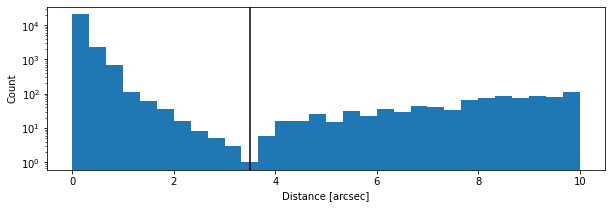

In [20]:
plt.figure(figsize = (10,3))
plt.hist(table['angDist'], bins = 30)
plt.axvline(x = 3.5, c = 'k')
plt.xlabel('Distance [arcsec]')
plt.ylabel('Count')
plt.yscale('log')

table = table[table['angDist'] < 3.5]

In [33]:
table = table[table['z'] > -900]


Text(0, 0.5, 'Count')

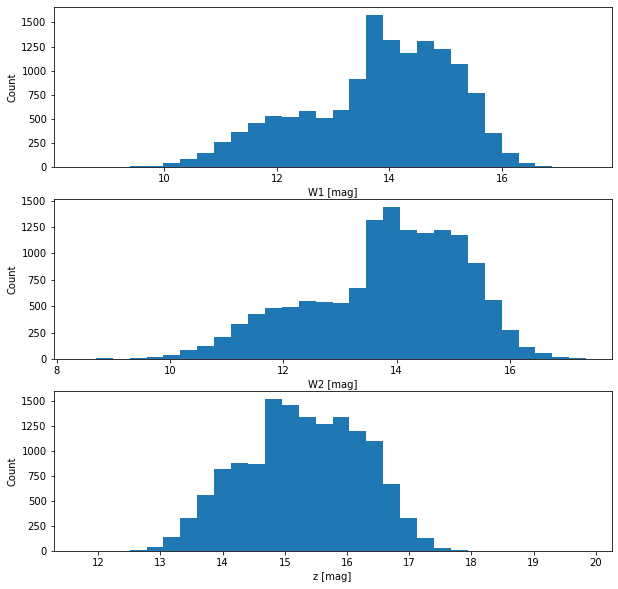

In [34]:
plt.figure(figsize = (10,10))

plt.subplot(3,1,1)
plt.hist(table['W1mag'], bins = 30)
plt.xlabel('W1 [mag]')
plt.ylabel('Count')

plt.subplot(3,1,2)
plt.hist(table['W2mag'], bins = 30)
plt.xlabel('W2 [mag]')
plt.ylabel('Count')

plt.subplot(3,1,3)
plt.hist(table['z'], bins = 30)
plt.xlabel('z [mag]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

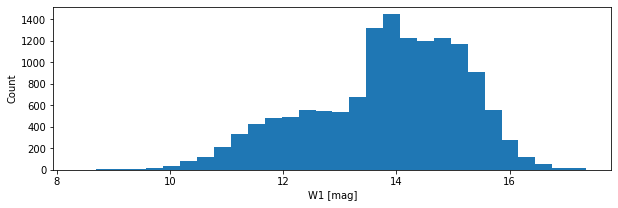

In [35]:
plt.figure(figsize = (10,3))
plt.hist(table['W2mag'], bins = 30)
plt.xlabel('W1 [mag]')
plt.ylabel('Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'z - W1')

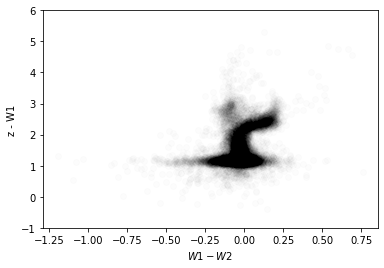

In [41]:
plt.scatter(table['W1mag'] - table['W2mag'], table['z'] - table['W1mag'], c = 'k', alpha = 0.01)

plt.legend(framealpha = 0)

plt.ylim(-1,6)

plt.xlabel(r'$W1 - W2$')
plt.ylabel(r'z - W1')

In [42]:
table

angDist,DRPVER,MPROCVER,MANGAID,MINMJD,MAXMJD,NVISITS,NPLATES,ra,dec,EPOCH,MNGTARG2,INPUT_LOGG,INPUT_TEFF,INPUT_FE_H,INPUT_ALPHA_M,INPUT_SOURCE,PHOTOCAT,u,g,r,i,z,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M
float64,str6,str6,str22,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,str14,str9,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,int64,int64,int64,int64,float64
0.50676,v3_1_1,v1_7_7,13-0,56741,56745,3,1,231.01780658696867,41.913900785404856,2003.3238525390625,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,16.26342010498047,15.38846206665039,15.056318283081055,14.935285568237305,14.904105186462402,J152404.23+415449.7,231.0176601,41.9138117,0.048,0.0465,144.3,13.641,13.589,13.057,9.691,14.073,13.885,13.821,0.024,0.028,0.418,--,0.026,0.04,0.055,2305142401351002774,0000,0,11nn,AACU,0,45,0,47,0.722
0.059287,v3_1_1,v1_7_7,13-1,56741,56745,3,1,230.9779115513416,41.51587852720575,2003.3238525390625,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,16.86233139038086,15.924821853637695,15.65964126586914,15.5343656539917,15.488884925842285,J152354.69+413057.1,230.9778917,41.5158856,0.0561,0.0542,139.6,14.354,14.414,13.192,9.645,14.685,14.483,14.341,0.026,0.039,--,--,0.037,0.052,0.084,2314140801351061044,0000,0,00nn,AAUU,102,63,196,67,0.039
0.136465,v3_1_1,v1_7_7,13-10,56741,56745,3,1,229.95203771283292,42.26929773840978,2003.406005859375,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,17.795345306396484,16.83037757873535,16.48142433166504,16.35013198852539,16.309675216674805,J151948.48+421609.3,229.952033,42.26926,0.0717,0.069,9.5,15.108,15.21,13.031,9.359,15.475,15.302,15.432,0.03,0.06,--,--,0.061,0.111,0.226,2305142401351035228,0000,0,11nn,AAUU,-28,111,-78,121,0.092
0.234272,v3_1_1,v1_7_7,13-11,56741,56745,3,1,232.324225827951,43.63022552248515,2002.34912109375,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,17.83548927307129,16.88359260559082,16.57887077331543,16.469959259033203,16.463754653930664,J152917.81+433748.5,232.3242218,43.6301605,0.0765,0.0733,6.6,15.337,15.364,13.116,9.652,15.725,15.398,15.131,0.031,0.064,0.421,--,0.06,0.088,0.158,2330143901351013445,000P,0,00nn,AACU,2,122,28,132,0.182
0.271502,v3_1_1,v1_7_7,13-2,56741,56745,3,1,230.6423911232239,42.44738739379231,2003.406005859375,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,18.878772735595703,17.965349197387695,17.626436233520508,17.506271362304688,17.46255874633789,J152234.18+422650.3,230.642433,42.4473186,0.1411,0.1298,12.9,16.334,16.713,13.194,9.659,16.524,15.997,15.798,0.048,0.183,--,--,0.113,--,--,2305142401351032842,0000,0,1nnn,ABUU,17,300,-332,322,0.283
0.294631,v3_1_1,v1_7_7,13-3,56741,56745,3,1,232.72585353713853,42.64115839395187,2003.3238525390625,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,16.91095733642578,16.07996940612793,15.797928810119629,15.705500602722168,15.666540145874023,J153054.18+423828.2,232.7257525,42.6411926,0.0572,0.056,2.4,14.575,14.56,13.242,9.554,14.862,14.58,14.568,0.026,0.039,--,--,0.036,0.045,0.094,2325142401351044978,0000,0,00nn,AAUU,-90,73,64,79,0.569
0.05549,v3_1_1,v1_7_7,13-4,56741,56745,3,1,230.52275999424432,43.01072841449852,2003.406005859375,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,17.18383026123047,16.255647659301758,15.943817138671875,15.811674118041992,15.725769996643066,J152205.45+430038.6,230.5227412,43.0107354,0.0582,0.0573,171.8,14.524,14.584,13.242,9.668,14.928,14.665,14.589,0.026,0.041,--,--,0.035,0.041,0.087,2305142401351059378,0000,0,11nn,AAUU,110,71,8,76,0.07
0.139209,v3_1_1,v1_7_7,13-5,56741,56745,3,1,232.69787967597313,43.33482968028721,2002.34912109375,1050624,-999.0,-999.0,-999.0,-999.0,--,sdss_dr8,17.264123916625977,16.334346771240234,16.10478973388672